In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [7]:
# Task 1

Test = pd.read_csv('occupancy_test.txt')
Train = pd.read_csv('occupancy_train.txt')

features = ["Humidity","Light","HumidityRatio"]

X_train = Train[features]
Y_train = Train["Occupancy"]

X_test = Test[features]
Y_test = Test["Occupancy"]

Accuracy = []

for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test,Y_pred)
    Accuracy.append(acc)
    print(f"Accuracy for k={i}: {acc}")
    
print(f"Maximum accuracy of {max(Accuracy)} is achieved when k={Accuracy.index(max(Accuracy))+1}")

Accuracy for k=1: 0.9403377110694184
Accuracy for k=2: 0.925328330206379
Accuracy for k=3: 0.9572232645403377
Accuracy for k=4: 0.9448405253283302
Accuracy for k=5: 0.9553470919324578
Accuracy for k=6: 0.9527204502814259
Accuracy for k=7: 0.9632270168855535
Accuracy for k=8: 0.9613508442776736
Accuracy for k=9: 0.9647279549718574
Accuracy for k=10: 0.9647279549718574
Maximum accuracy of 0.9647279549718574 is achieved when k=9


In [4]:
from sklearn.datasets import load_iris

# Task 2

def chi_squared_distance(x1, x2):
    return np.sum((x1 - x2) ** 2 / (x1 + x2 + 1e-10))

class KNN:
    def __init__(self,k):
        self.k = k
    
    def fit(self,X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train
        
    def predict(self,X_test):
        predictions = []
        for i in X_test:
            distances = [chi_squared_distance(i, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.Y_train[i] for i in k_indices]
            most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
            predictions.append(most_common)
        return np.array(predictions)
    
        
iris = load_iris()
X = iris.data
Y = iris.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

knn = KNN(k=3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
confusion = confusion_matrix(Y_test, Y_pred)

print(f"Accuracy: {accuracy*100} %")
print(f"Confusion Matrix: {confusion}")


Accuracy: 100.0 %
Confusion Matrix: [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Level
High      365
Medium    332
Low       303
Name: count, dtype: int64


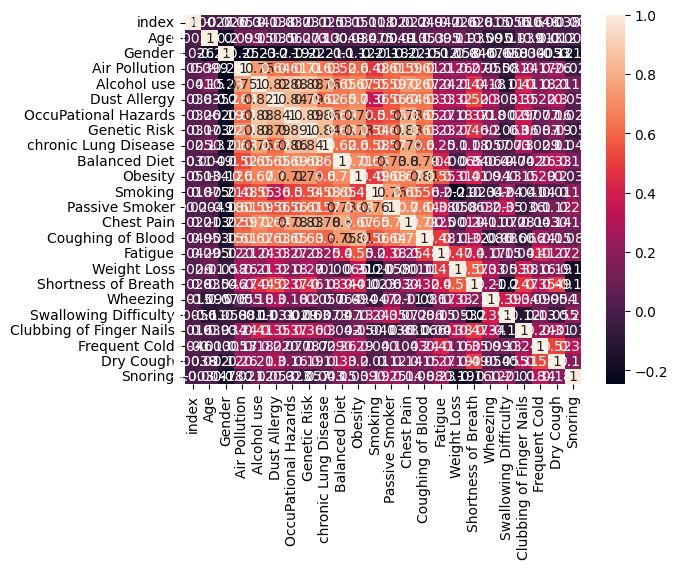

Accuracy 1: 100.0 %
Accuracy 2: 100.0 %


Using different distance metrics:-

Metric: euclidean
Accuracy 1: 100.0 %
Accuracy 2: 100.0 %
Metric: manhattan
Accuracy 1: 100.0 %
Accuracy 2: 100.0 %
Metric: minkowski
Accuracy 1: 100.0 %
Accuracy 2: 100.0 %


In [ ]:
# Task 3

from sklearn.preprocessing import LabelEncoder, StandardScaler


df = pd.read_csv('cancer_patient_data_sets.csv')

# Checking Balance
print(df['Level'].value_counts())

# Empty records, categorical feature, duplicate records
# df.isnull().sum() # No empty records
a = df.select_dtypes(include=['object']).columns # Patient Id and Level are categorical features
# df.duplicated().sum() # No duplicate records

# Handling categorical features
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

df.drop('Patient Id',axis=1,inplace=True)

Y = df['Level']
X = df.drop('Level',axis=1)

label = LabelEncoder()
y_encoded = label.fit_transform(Y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,y_encoded,train_size=0.8,random_state=0,stratify=y_encoded)
X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,train_size=0.7,random_state=0,stratify=Y_train)

knn = KNeighborsClassifier(n_neighbors=5)
model = knn.fit(X_train,Y_train)
Y_pred1 = model.predict(X_train)
Y_pred2 = model.predict(X_val)
acc1 = accuracy_score(Y_train,Y_pred1)
acc2 = accuracy_score(Y_val,Y_pred2)

print(f"Accuracy 1: {acc1*100} %")
print(f"Accuracy 2: {acc2*100} %")

print("\n\nUsing different distance metrics:-\n")

metrics = ['euclidean', 'manhattan', 'minkowski']

for i in metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=i)
    model = knn.fit(X_train,Y_train)
    Y_pred1 = model.predict(X_train)
    Y_pred2 = model.predict(X_test)
    acc1 = accuracy_score(Y_train,Y_pred1)
    acc2 = accuracy_score(Y_test,Y_pred2)
    print(f"Metric: {i}")
    print(f"Accuracy 1: {acc1*100} %")
    print(f"Accuracy 2: {acc2*100} %")